# Intent Classification

<p> NLP Individual Submission </p>
<p> Name- Debjyoti Saha</p>
<p> Student ID- 6706459</p>
<p> Group- 1</p>

<p> Intent Classification is mainly used to understand the context of the text words given by the user. In this indivudual submission I have explored some different techniques through which we can classify the intent of the chatbot. This is the 1st Python file (.ipynb) and the second python file contains a initial stage chatbot which works on Intent Classification.</p>

<p> The dataset used in this Python file is a substitution dataset for Intent Classification. In total, I have used 2 datasets to satisfy the conditions using Python NLTK libraries.</p>

<p> The datasets are taken from Kaggle and some of the libraries and specification a referred from GitHub, Kaggle and Python documentation. The links to the dataset are given below.</p>

<p> Dataset Links:-</p> 
    1. "Text Commands.csv" - https://github.com/KoushikiDasgupta/Intent-Analysis-for-Offline-Voice-Commanding/blob/main/CNN%20model1/TextCommands.csv </p>
    2. Atis Intent Train and Test - https://www.kaggle.com/datasets/hassanamin/atis-airlinetravelinformationsystem </p>

In [1]:
import warnings
warnings.filterwarnings('ignore')

## Intent Classification using Convolutional Neural Network (CNN)

In [2]:
import pandas as pd
data=pd.read_csv(r'D:\Surrey\Semester\Semester 2\NLP\TextCommands.csv')

In [3]:
data.columns=['text', 'label', 'misc']
data.head()

,text,label,misc
0,Undo the last sentence,1,NaN
1,Undo the last word,1,NaN
2,Can you undo the last sentence,1,NaN
3,Please undo the text,1,NaN
4,Undo the selected text,1,NaN


<p> The dataset contains different labels. The total intents labelled are from 1 to 26. The dataset needs to be in balanced manner. </p>

<p> For data preprocessing, we need to go through Tokenizing, Sequence Padding. Tokenization is the collection of unique words from the dataset and are assigned to integer. Padding, on the other hand represents the dataset with zeros.

In [4]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
#tf.keras.utils.to_categorical
from tensorflow.keras.utils import to_categorical
MAX_SEQUENCE_LENGTH=10
MAX_NUM_WORDS=5000
tokenizer=Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(data['text'])
sequences=tokenizer.texts_to_sequences(data['text'])
word_index=tokenizer.word_index
#print('Unique tokens are:' %len(word_index))
data1=pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
labels=to_categorical(np.asarray(data['label']))
print('Data tensorflow', data1.shape)
print('Label tensorflow', labels.shape)

Data tensorflow (399, 10)
Label tensorflow (399, 27)


In [5]:
VALIDATION_SPLIT=0.1
indices=np.arange(data1.shape[0])
np.random.shuffle(indices)
data1=data1[indices]
labels=labels[indices]
num_validation_samples=int(VALIDATION_SPLIT * data1.shape[0])
x_train=data1[:-num_validation_samples]
y_train=labels[:-num_validation_samples]
x_val=data1[-num_validation_samples:]
y_val=labels[-num_validation_samples:]

In [6]:
from keras.layers import Dense, Input, GlobalMaxPooling1D
from keras.layers import Conv1D, MaxPooling1D, Embedding, Flatten
from keras.models import Model
from keras.models import Sequential
from keras.initializers import Constant
EMBEDDING_DIM=60
num_words=min(MAX_NUM_WORDS, len(word_index) +1)
embedding_layer=Embedding(num_words, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH, trainable=True)

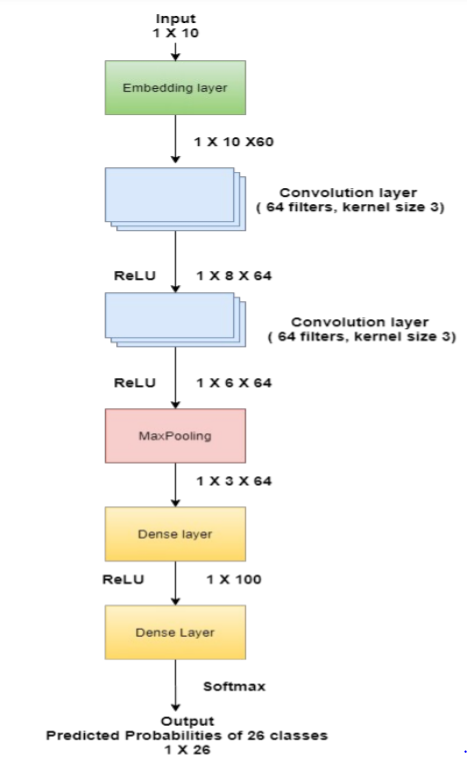

<p> Reference Link: - https://www.researchgate.net/figure/Block-diagram-of-CNN-architecture_fig2_341019121

<p> Why I have used CNN as one of my technique?</p>

<p> As we have seen in lectures, neural networks can identify relevant bigrams, trigrams, n-grams depending on the kernel size. The order of words doesn't matter here and this is one of the advantage of using CNN in detecting the Intent. </p>
<p> Similar to sentiment analysis, the CNN rectifies the text by the presence or absence of some phrases.</p>

In [7]:
sequence_input=Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences=embedding_layer(sequence_input)
x=Conv1D(64, 3, activation='relu')(embedded_sequences)
x=Conv1D(64, 3, activation='relu')(x)
x=MaxPooling1D(2)(x)
x=Flatten()(x)
x=Dense(100, activation='relu')(x)
preds=Dense(27, activation='softmax')(x)
model=Model(sequence_input, preds)
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 embedding (Embedding)       (None, 10, 60)            8580      
                                                                 
 conv1d (Conv1D)             (None, 8, 64)             11584     
                                                                 
 conv1d_1 (Conv1D)           (None, 6, 64)             12352     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 3, 64)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 192)               0         
                                                             

In [8]:
s=0.0
for i in range(1, 50):
    model.fit(x_train, y_train, batch_size=50, epochs=30, validation_data=(x_val, y_val))
    scores=model.evaluate(x_val, y_val, verbose=0)
    s=s+(scores[1]*100)

Epoch 1/30
8/8 [==============================] - 1s 26ms/step - loss: 3.2819 - acc: 0.0861 - val_loss: 3.2537 - val_acc: 0.1026
Epoch 2/30
8/8 [==============================] - 0s 5ms/step - loss: 3.2143 - acc: 0.1361 - val_loss: 3.1915 - val_acc: 0.1538
Epoch 3/30
8/8 [==============================] - 0s 6ms/step - loss: 3.1113 - acc: 0.1639 - val_loss: 3.0775 - val_acc: 0.1795
Epoch 4/30
8/8 [==============================] - 0s 6ms/step - loss: 2.9785 - acc: 0.2194 - val_loss: 2.8949 - val_acc: 0.2308
Epoch 5/30
8/8 [==============================] - 0s 5ms/step - loss: 2.8030 - acc: 0.2667 - val_loss: 2.7676 - val_acc: 0.2564
Epoch 6/30
8/8 [==============================] - 0s 5ms/step - loss: 2.6240 - acc: 0.2833 - val_loss: 2.5221 - val_acc: 0.2821
Epoch 7/30
8/8 [==============================] - 0s 5ms/step - loss: 2.4240 - acc: 0.3028 - val_loss: 2.4229 - val_acc: 0.3333
Epoch 8/30
8/8 [==============================] - 0s 5ms/step - loss: 2.2324 - acc: 0.3778 - val_loss: 

In [9]:
scores=model.evaluate(x_val, y_val, verbose=0)
print((model.metrics_names[1], scores[1]*100))

('acc', 92.30769276618958)


<p> The accuracy of the model varies from 85% - 95%. We can improve the accuracy by fluctuating the hyperparameters. 

In [10]:
Xnew=["kindly undo the changes","Can you please undo the last paragraph","Make bold this","Would you be kind enough to bold the last word?","Please remove bold from the last paragraph","Kindly unbold the selected text","Kindly insert comment here","Can you please put a comment here","Can you please centre align this text","Can you please position this text in the middle"]
sequences_new=tokenizer.texts_to_sequences(Xnew)
data=pad_sequences(sequences_new, maxlen=MAX_SEQUENCE_LENGTH)
yprob=model.predict(data)
yclasses=yprob.argmax(axis=1)
print("X=%s, Predicted=%s \nX=%s, \nPredicted=%s \nX=%s, \nPredicted=%s \nX=%s, Predicted=%s \nX=%s, Predicted=%s \nX=%s, Predicted=%s \nX=%s, Predicted=%s \nX=%s, Predicted=%s \nX=%s, Predicted=%s \nX=%s, Predicted=%s" % (Xnew[0], yclasses[0],Xnew[1],yclasses[1],Xnew[2],yclasses[2],Xnew[3],yclasses[3],Xnew[4],yclasses[4],Xnew[5],yclasses[5],Xnew[6],yclasses[6],Xnew[7],yclasses[7],Xnew[8],yclasses[8],Xnew[9],yclasses[9]))

X=kindly undo the changes, Predicted=1 
X=Can you please undo the last paragraph, 
Predicted=1 
X=Make bold this, 
Predicted=2 
X=Would you be kind enough to bold the last word?, Predicted=2 
X=Please remove bold from the last paragraph, Predicted=3 
X=Kindly unbold the selected text, Predicted=3 
X=Kindly insert comment here, Predicted=19 
X=Can you please put a comment here, Predicted=15 
X=Can you please centre align this text, Predicted=14 
X=Can you please position this text in the middle, Predicted=14


<p> CNN worked well when passed through the dataset.</p>

## Intent Classification using Universal Sentence Encoder

In [11]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from tqdm.auto import tqdm
tqdm.pandas()

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.layers import Dense, Input, Flatten, BatchNormalization, Dropout, Concatenate
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

<p> ATIS is a most common dataset used for intent classification. The dataset contains large number of messages and their intents.</p>

In [12]:
train=pd.read_csv(r'D:\Surrey\Semester\Semester 2\NLP\atis_intents_train.csv')
train.columns=['intent', 'snippet']

In [13]:
train.head()

,intent,snippet
0,atis_flight,what flights are available from pittsburgh to...
1,atis_flight_time,what is the arrival time in san francisco for...
2,atis_airfare,cheapest airfare from tacoma to orlando
3,atis_airfare,round trip fares from pittsburgh to philadelp...
4,atis_flight,i need a flight tomorrow from columbus to min...


In [14]:
train.intent.value_counts(), train.intent.value_counts(normalize=True)

(atis_flight            3665
 atis_airfare            423
 atis_ground_service     255
 atis_airline            157
 atis_abbreviation       147
 atis_aircraft            81
 atis_flight_time         54
 atis_quantity            51
 Name: intent, dtype: int64,
 atis_flight            0.758328
 atis_airfare           0.087523
 atis_ground_service    0.052762
 atis_airline           0.032485
 atis_abbreviation      0.030416
 atis_aircraft          0.016760
 atis_flight_time       0.011173
 atis_quantity          0.010552
 Name: intent, dtype: float64)

In [15]:
train.intent.value_counts(), train.intent.value_counts(normalize=True)

(atis_flight            3665
 atis_airfare            423
 atis_ground_service     255
 atis_airline            157
 atis_abbreviation       147
 atis_aircraft            81
 atis_flight_time         54
 atis_quantity            51
 Name: intent, dtype: int64,
 atis_flight            0.758328
 atis_airfare           0.087523
 atis_ground_service    0.052762
 atis_airline           0.032485
 atis_abbreviation      0.030416
 atis_aircraft          0.016760
 atis_flight_time       0.011173
 atis_quantity          0.010552
 Name: intent, dtype: float64)

In [16]:
test=pd.read_csv(r'D:\Surrey\Semester\Semester 2\NLP\atis_intents_test.csv')
test.columns=['intent', 'snippet']
test.head()

,intent,snippet
0,atis_airfare,on april first i need a ticket from tacoma to...
1,atis_flight,on april first i need a flight going from pho...
2,atis_flight,i would like a flight traveling one way from ...
3,atis_flight,i would like a flight from orlando to salt la...
4,atis_flight,i need a flight from toronto to newark one wa...


In [17]:
test.intent.value_counts(), test.intent.value_counts(normalize=True)

(atis_flight            631
 atis_airfare            48
 atis_airline            38
 atis_ground_service     36
 atis_abbreviation       33
 atis_aircraft            9
 atis_quantity            3
 atis_flight_time         1
 Name: intent, dtype: int64,
 atis_flight            0.789737
 atis_airfare           0.060075
 atis_airline           0.047559
 atis_ground_service    0.045056
 atis_abbreviation      0.041302
 atis_aircraft          0.011264
 atis_quantity          0.003755
 atis_flight_time       0.001252
 Name: intent, dtype: float64)

In [18]:
train_data = train.snippet.values
train_labels = train.intent.values
test_data = test.snippet.values
test_labels = test.intent.values

len(train_data), len(train_labels), len(test_data), len(test_labels)

(4833, 4833, 799, 799)

In [19]:
print(train_data[123])
print(train_labels[123])

 okay i need to get a flight from houston to seattle
atis_flight


In [20]:
y_train = pd.get_dummies(train_labels)
print(y_train.shape)
y_train.head()

(4833, 8)


,atis_abbreviation,atis_aircraft,atis_airfare,atis_airline,atis_flight,atis_flight_time,atis_ground_service,atis_quantity
0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0


In [21]:
y_test = pd.get_dummies(test_labels)
print(y_test.shape)
y_test.head()

(799, 8)


,atis_abbreviation,atis_aircraft,atis_airfare,atis_airline,atis_flight,atis_flight_time,atis_ground_service,atis_quantity
0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0


<p> Universal Sentence Encoder is developer tool from Google which is used as a Python Library for Intent Classifcation. </p>

<p> Initially this link will take time to load depending on your system. </p>

In [22]:
%%time
module_url = 'https://tfhub.dev/google/universal-sentence-encoder-large/4'
embed = hub.KerasLayer(module_url, trainable=True, name='USE_embedding')

Wall time: 33.7 s


In [23]:
def build_model(embed):
    
    model = Sequential([
        Input(shape=[], dtype=tf.string),
        embed,
        Dense(8, activation='softmax')
    ])
    model.compile(Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

model = build_model(embed)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE_embedding (KerasLayer)  {'outputs': (None, 512)}  147354880 
                                                                 
 dense_2 (Dense)             (None, 8)                 4104      
                                                                 
Total params: 147,358,984
Trainable params: 147,358,984
Non-trainable params: 0
_________________________________________________________________


In [24]:
checkpoint = ModelCheckpoint('modelATIS.h5', monitor='val_loss', save_best_only=True)

train_history = model.fit(
    train_data, y_train,
    validation_split=0.20,
    epochs = 10,
    callbacks=[checkpoint],
    batch_size=32
)

Epoch 1/10


121/121 [==============================] - 300s 2s/step - loss: 1.6702 - accuracy: 0.7142 - val_loss: 1.3657 - val_accuracy: 0.7497
Epoch 2/10
121/121 [==============================] - 205s 2s/step - loss: 1.2536 - accuracy: 0.7770 - val_loss: 1.1902 - val_accuracy: 0.8108
Epoch 3/10
121/121 [==============================] - 202s 2s/step - loss: 1.1249 - accuracy: 0.8531 - val_loss: 1.0699 - val_accuracy: 0.9080
Epoch 4/10
121/121 [==============================] - 194s 2s/step - loss: 1.0263 - accuracy: 0.9296 - val_loss: 0.9832 - val_accuracy: 0.9731
Epoch 5/10
121/121 [==============================] - 191s 2s/step - loss: 0.9560 - accuracy: 0.9713 - val_loss: 0.9228 - val_accuracy: 0.9835
Epoch 6/10
121/121 [==============================] - 194s 2s/step - loss: 0.9035 - accuracy: 0.9801 - val_loss: 0.8787 - val_accuracy: 0.9845
Epoch 7/10
121/121 [==============================] - 195s 2s/step - loss: 0.8623 - accuracy: 0.9858 - val_loss: 0.8438 - val_accuracy: 0.9917
Epoch 8/10

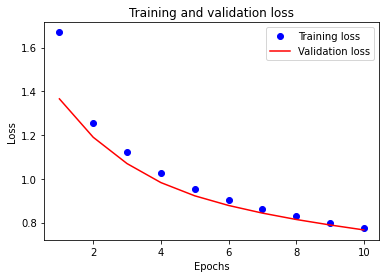

In [25]:
plt.clf()
history_dict = train_history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (len(history_dict['loss']) + 1))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

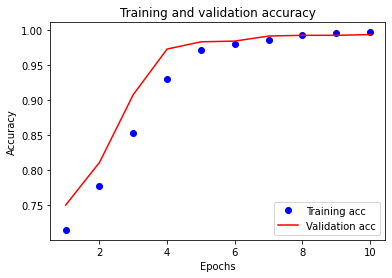

In [26]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, (len(history_dict['accuracy']) + 1))
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<p> The figure 1 gives the loss value. As the epochs are increased the loss values are decreased, this denotes that the model is working well with the intents and also it is able to understand the context better.</p>

<p> The figure 2 graph also comes in support of the model. The accuracy is is increased which means the model can be able to detect some complex intents when tested. </p>

In [27]:
rawPreds = model.predict(test_data)
rawPreds.shape

(799, 8)

In [28]:
Preds = []

for j in range(rawPreds.shape[0]):
    pos = rawPreds[j].argmax()
    Preds.append(y_test.columns[pos])
    
len(Preds)

799

In [29]:
print(classification_report(Preds, test_labels))

                     precision    recall  f1-score   support

  atis_abbreviation       1.00      1.00      1.00        33
      atis_aircraft       1.00      1.00      1.00         9
       atis_airfare       1.00      1.00      1.00        48
       atis_airline       1.00      1.00      1.00        38
        atis_flight       0.99      1.00      1.00       627
   atis_flight_time       1.00      1.00      1.00         1
atis_ground_service       1.00      1.00      1.00        36
      atis_quantity       1.00      0.43      0.60         7

           accuracy                           0.99       799
          macro avg       1.00      0.93      0.95       799
       weighted avg       1.00      0.99      0.99       799



<p> The classification report is the final draft which gives us the brief about the model. We can see that the model is giving us 99% accuracy on detecting the intent. </p>

## Intent Classification using LSTM 

<p> This is the same dataset as previous one, in this experiment we are using LSTM. </p>

In [30]:
import pandas as pd
import numpy as np

In [31]:
train_data=pd.read_csv(r'D:\Surrey\Semester\Semester 2\NLP\atis_intents_train.csv', names=['target', 'text'])

In [32]:
test_data=pd.read_csv(r'D:\Surrey\Semester\Semester 2\NLP\atis_intents_test.csv', names=['target', 'text'])

In [33]:
train_data

,target,text
0,atis_flight,i want to fly from boston at 838 am and arriv...
1,atis_flight,what flights are available from pittsburgh to...
2,atis_flight_time,what is the arrival time in san francisco for...
3,atis_airfare,cheapest airfare from tacoma to orlando
4,atis_airfare,round trip fares from pittsburgh to philadelp...
...,...,...
4829,atis_airfare,what is the airfare for flights from denver t...
4830,atis_flight,do you have any flights from denver to baltim...
4831,atis_airline,which airlines fly into and out of denver
4832,atis_flight,does continental fly from boston to san franc...


In [34]:
train_data.groupby('target').count()

,text
target,
atis_abbreviation,147
atis_aircraft,81
atis_airfare,423
atis_airline,157
atis_flight,3666
atis_flight_time,54
atis_ground_service,255
atis_quantity,51


In [35]:
train_data=train_data.append(train_data.loc[train_data.target.isin(['atis_flight_time', 'atis_quantity']), :])

In [36]:
from sklearn.preprocessing import OneHotEncoder as OHE
y_encoder=OHE().fit(np.array(train_data.target).reshape(-1,1))

In [37]:
ytr_encoded=y_encoder.transform(np.array(train_data.target).reshape(-1,1)).toarray()
yts_encoded=y_encoder.transform(np.array(test_data.target).reshape(-1,1)).toarray()

In [38]:
import nltk

In [39]:
train_data['lower_text']=train_data.text.map(lambda x: x.lower())
test_data['lower_text']= test_data.text.map(lambda x: x.lower())

In [40]:
from nltk import word_tokenize

train_data["tokenized"]= train_data.lower_text.map(word_tokenize)
test_data["tokenized"]= test_data.lower_text.map(word_tokenize)

In [41]:
from nltk.corpus import stopwords
from string import punctuation

def remove_stop(strings, stop_list):
    classed=[s for s in strings if s not in stop_list]
    return classed

stop=stopwords.words('english')
stop_punc=list(set(punctuation)) + stop

train_data['selected']= train_data.tokenized.map(lambda df: remove_stop(df, stop_punc))
test_data['selected']= test_data.tokenized.map(lambda df: remove_stop(df, stop_punc))

In [42]:
from nltk.stem import PorterStemmer
def normalize(text):
    return " ".join(text)

stemmer=PorterStemmer()

train_data['stemmed']=train_data.selected.map(lambda xs: [stemmer.stem(x) for x in xs])
train_data['normalized']=train_data.stemmed.apply(normalize)

test_data['stemmed']=test_data.selected.map(lambda xs: [stemmer.stem(x)for x in xs])
test_data['normalized']=test_data.stemmed.apply(normalize)

In [43]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_data.normalized)

tokenized_train=tokenizer.texts_to_sequences(train_data.normalized)
tokenized_test=tokenizer.texts_to_sequences(test_data.normalized)

In [44]:
tokenizer.word_index.keys().__len__()

654

In [45]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_padded=pad_sequences(tokenized_train, maxlen=20, padding='pre')
test_padded=pad_sequences(tokenized_test, maxlen=20, padding='pre')

In [46]:
train_padded.shape

(4939, 20)

In [47]:
def transform_x(data, tokenizer):
    output_shape=[data.shape[0],
                 data.shape[1],
                 tokenizer.word_index.keys().__len__()]
    results= np.zeros(output_shape)
    
    for i in range(data.shape[0]):
        for ii in range(data.shape[1]):
            results[i, ii, data[i, ii]-1]=1
    return results

xtr_transformed=transform_x(train_padded, tokenizer)
xts_transformed=transform_x(test_padded, tokenizer)

In [48]:
from tensorflow.keras.layers import Dense, LSTM, BatchNormalization, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy as CC
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.initializers import he_uniform, glorot_uniform
from tensorflow.keras.metrics import AUC
from tensorflow.keras import Model
from tensorflow.keras.regularizers import l2


class LSTMModel(object):
    
    def build_model(self, input_dim, output_shape, steps, dropout_rate, kernel_regularizer, bias_regularizer):
        input_layer= Input(shape= (steps, input_dim))
        
        #make lstm_layer
        lstm= LSTM(units= steps)(input_layer)
        dense_1= Dense(output_shape, kernel_initializer= he_uniform(),
                       bias_initializer= "zeros", 
                       kernel_regularizer= l2(l= kernel_regularizer),
                       bias_regularizer= l2(l= bias_regularizer))(lstm)
        x= BatchNormalization()(dense_1)
        x= relu(x)
        x= Dropout(rate= dropout_rate)(x)
        o= Dense(output_shape, kernel_initializer= glorot_uniform(),
                 bias_initializer= "zeros", 
                 kernel_regularizer= l2(l= kernel_regularizer), 
                 bias_regularizer= l2(l= bias_regularizer))(dense_1)
        o= BatchNormalization()(o)
        output= softmax(o, axis= 1)
        
        loss= CC()
        metrics= AUC()
        optimizer= Adam()
        self.model= Model(inputs= [input_layer], outputs= [output])
        self.model.compile(optimizer= optimizer, loss= loss, metrics= [metrics])
        
        
    def train(self, x, y, validation_split, epochs):
        self.model.fit(x, y, validation_split= validation_split, epochs= epochs)
        
    def predict(self, x):
        return self.model.predict(x)

In [49]:
steps=xtr_transformed.shape[1]
dim=xtr_transformed.shape[2]
output_shape=ytr_encoded.shape[1]

model=LSTMModel()
model.build_model(input_dim=dim,
                 output_shape=output_shape,
                 steps=steps,
                 dropout_rate=0.5,
                 bias_regularizer=0.3,
                 kernel_regularizer=0.3)

In [50]:
model.train(xtr_transformed, ytr_encoded, 0.2, 60)

Epoch 1/60
124/124 [==============================] - 5s 21ms/step - loss: 6.9890 - auc: 0.7541 - val_loss: 5.2727 - val_auc: 0.8697
Epoch 2/60
124/124 [==============================] - 2s 15ms/step - loss: 3.9138 - auc: 0.9456 - val_loss: 3.2801 - val_auc: 0.9646
Epoch 3/60
124/124 [==============================] - 2s 16ms/step - loss: 2.3535 - auc: 0.9762 - val_loss: 2.2473 - val_auc: 0.9512
Epoch 4/60
124/124 [==============================] - 2s 16ms/step - loss: 1.5406 - auc: 0.9877 - val_loss: 2.0054 - val_auc: 0.8637
Epoch 5/60
124/124 [==============================] - 2s 16ms/step - loss: 1.1348 - auc: 0.9905 - val_loss: 1.6535 - val_auc: 0.8905
Epoch 6/60
124/124 [==============================] - 2s 16ms/step - loss: 0.9098 - auc: 0.9941 - val_loss: 0.9878 - val_auc: 0.9782
Epoch 7/60
124/124 [==============================] - 2s 16ms/step - loss: 0.7803 - auc: 0.9951 - val_loss: 0.9267 - val_auc: 0.9777
Epoch 8/60
124/124 [==============================] - 2s 14ms/step - 

In [51]:
from sklearn.metrics import classification_report
prediction=y_encoder.inverse_transform(model.predict(xtr_transformed))
print(classification_report(train_data.target, prediction))

                     precision    recall  f1-score   support

  atis_abbreviation       0.85      1.00      0.92       147
      atis_aircraft       0.97      0.94      0.96        81
       atis_airfare       1.00      0.99      0.99       423
       atis_airline       0.99      0.87      0.93       157
        atis_flight       1.00      1.00      1.00      3666
   atis_flight_time       0.96      0.96      0.96       108
atis_ground_service       0.97      1.00      0.99       255
      atis_quantity       1.00      1.00      1.00       102

           accuracy                           0.99      4939
          macro avg       0.97      0.97      0.97      4939
       weighted avg       0.99      0.99      0.99      4939



<p> By programming through LSTM algorithm we can see the training data accuracy is 98%. So the training is recognized well by the library. The next step is whether this can be same in test data or not. </p>

In [52]:
from sklearn.metrics import classification_report

prediction_test= y_encoder.inverse_transform(model.predict(xts_transformed))
print(classification_report(test_data.target, prediction_test))

                     precision    recall  f1-score   support

  atis_abbreviation       0.60      1.00      0.75        33
      atis_aircraft       0.83      0.56      0.67         9
       atis_airfare       1.00      0.92      0.96        48
       atis_airline       1.00      0.42      0.59        38
        atis_flight       0.99      0.99      0.99       632
   atis_flight_time       1.00      1.00      1.00         1
atis_ground_service       0.97      0.97      0.97        36
      atis_quantity       0.38      1.00      0.55         3

           accuracy                           0.95       800
          macro avg       0.85      0.86      0.81       800
       weighted avg       0.97      0.95      0.95       800



<p> LSTM test data accuracy is same as train data, which is 98%. This means on an average this model will give 98% accurate data. </p>

## Intent Classification using Spacy

In [53]:
import numpy as np
import pandas as pd
import os
import spacy
import csv

<p> The library Spacy is also one of the most used library for intent classifiers. The following experiment is a failed experiment because I need, "en_vectors_we_lg" and this doesn't supports in the latest version of Spacy. </p>

In [54]:
!python -m spacy download en_vectors_web_lg
!python -m spacy link en_vectors_web_lg en_vectors_web_lg


[x] No compatible package found for 'en_vectors_web_lg' (spaCy v3.2.4)



2022-04-28 14:50:48.321987: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-04-28 14:50:48.322023: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


[!] As of spaCy v3.0, model symlinks are not supported anymore. You can load
trained pipeline packages using their full names or from a directory path.


2022-04-28 14:50:57.250268: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-04-28 14:50:57.250295: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [55]:
path=r'D:\Surrey\Semester\Semester 2\NLP'

In [56]:
def read_data(path):
    with open(path, 'r') as csvfile:
        readCSV=csv.reader(csvfile, delimiter=',')
        labels=[]
        sentences=[]
        for row in readCSV:
            label=row[0]
            sentence=row[1]
            labels.append(label)
            sentences.append(sentence)
    return sentences, labels

In [57]:
sentences_test, labels_test=read_data(r'D:\Surrey\Semester\Semester 2\NLP\atis_intents_test.csv')
print(sentences_test[:3], '\n')
print(labels_test[:3])

[' i would like to find a flight from charlotte to las vegas that makes a stop in st. louis', ' on april first i need a ticket from tacoma to san jose departing before 7 am', ' on april first i need a flight going from phoenix to san diego'] 

['atis_flight', 'atis_airfare', 'atis_flight']


In [58]:
sentences_train, labels_train = read_data(r'D:\Surrey\Semester\Semester 2\NLP\atis_intents_train.csv')

In [59]:
df1=pd.read_csv(r'D:\Surrey\Semester\Semester 2\NLP\atis_intents_train.csv', delimiter=',')
df1.dataframeName='atis_intents_train.csv'
nRow, nCol,= df1.shape
print(f'{nRow} rows & {nCol} columns')

4833 rows & 2 columns


In [60]:
df1.sample(10)

,atis_flight,i want to fly from boston at 838 am and arrive in denver at 1110 in the morning
795,atis_flight,flights from cleveland to kansas city on monday
4022,atis_ground_service,what ground transportation is available at th...
393,atis_abbreviation,what is mco
2865,atis_flight,show me the flights from baltimore to oakland
274,atis_flight,i need a flight this sunday from miami to las...
280,atis_flight,show me the flights from baltimore to oakland
4826,atis_flight,please list all flights from san francisco to...
3460,atis_flight,i want to go from boston to oakland
3333,atis_airfare,what's the lowest round trip fare from dallas...
4054,atis_flight,show me the flights from atlanta to boston


In [61]:
df1.describe()

,atis_flight,i want to fly from boston at 838 am and arrive in denver at 1110 in the morning
count,4833,4833
unique,8,4498
top,atis_flight,what is fare code h
freq,3665,8


In [62]:
def label_encoding(labels):
    # Calculate the length of labels

    n_labels = len(labels)
    print('Number of labels :-',n_labels)
    
    from sklearn.preprocessing import LabelEncoder
    # instantiate labelencoder object
    le = LabelEncoder()
    y =le.fit_transform(labels)
    print(y[:100])
    print('Length of y :- ',y.shape)
    return y

train_y = label_encoding(labels_train)
test_y = label_encoding(labels_test)

Number of labels :- 4834
[4 4 5 2 2 4 1 4 4 6 4 4 4 4 2 6 4 4 4 4 4 4 1 2 4 3 4 6 4 2 4 4 4 4 2 3 4
 4 4 4 3 3 4 3 6 0 4 4 5 4 4 4 0 4 4 4 4 4 3 4 6 3 4 4 4 4 0 4 4 4 4 1 2 4
 4 4 4 4 4 4 3 4 4 4 4 4 4 4 2 4 6 7 4 4 4 4 4 4 4 4]
Length of y :-  (4834,)
Number of labels :- 800
[4 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 6 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 3 5]
Length of y :-  (800,)


Text(0, 0.5, 'Frequency')

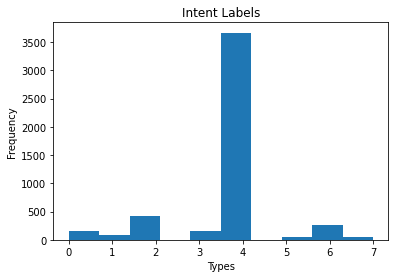

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(train_y)
plt.title('Intent Labels')
plt.xlabel('Types')
plt.ylabel('Frequency')
#df1['atis_flight'].hist()

<p>The above visualisation shows the number of intent present in the dataset. As the program needs some specific library to go forward. This experiment is halted in between. </p>

## References



<p> Links : -</p>
   <p> 1. https://blog.vsoftconsulting.com/blog/intent-classification-and-its-significance-in-chatbot-develop </p>
   <p> 2. https://paperswithcode.com/task/intent-classification </p>
   <p>3. https://dasha.ai/en-us/blog/intent-classification </p>
   <p> 4. https://www.helpshift.com/glossary/intent-classification/ </p>
   <p> 5. https://monkeylearn.com/blog/intent-classification/#:~:text=Intent%20classification%20is%20the%20automated,%2C%20Unsubscribe%2C%20and%20Demo%20Request.</p>

<p> This is first python file in which I have tried various experiments using Python NLTK libraries. The second Python file is demonstration of Intent based chatbot, the file will be executed through different inbuilt python file. The execution direction will be given at the start of the program. </p>

<p> The folder named as, 'Intent Chatbot' consists of 4 different python files which are related to each other. There is a separate 'ReadMe.txt' file on how to execute that folder.</p>